In [1]:
import torchvision.models as models
import torch.optim as optim
import time
import torch
import torch.nn as nn
from Train import trainmodel
time1 = time.time()
print(time1)
batch_size = [36]
device = 6
model_name_list = ["untran-vgg16bn"]
model1 = models.vgg16_bn(pretrained=False)
model1

1591155344.0590708


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [2]:
model1.classifier=nn.Sequential(nn.Linear(25088,4096),nn.ReLU(inplace = True),\
                               nn.Dropout(0.5),nn.Linear(4096,4096),\
                               nn.ReLU(inplace = True),nn.Dropout(0.5),nn.Linear(4096,6))
model1

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

untran-vgg16bn
1768 328
Epoch: 1
Epoch: 001, Training: Loss: 8.3790, Accuracy: 20.2489%,Valid: Loss: 2.5209, Accuracy: 25.0000%,Time: 21.8093s
Epoch: 2
Epoch: 002, Training: Loss: 1.7196, Accuracy: 22.6244%,Valid: Loss: 1.6634, Accuracy: 29.5732%,Time: 21.3199s
Epoch: 3
Epoch: 003, Training: Loss: 1.5385, Accuracy: 34.4457%,Valid: Loss: 1.5021, Accuracy: 35.0610%,Time: 21.3022s
Epoch: 4
Epoch: 004, Training: Loss: 1.4749, Accuracy: 37.1041%,Valid: Loss: 1.4287, Accuracy: 38.4146%,Time: 21.2149s
Epoch: 5
Epoch: 005, Training: Loss: 1.4408, Accuracy: 39.4231%,Valid: Loss: 1.4127, Accuracy: 39.6341%,Time: 21.9060s
Epoch: 6
Epoch: 006, Training: Loss: 1.4013, Accuracy: 42.7602%,Valid: Loss: 1.3820, Accuracy: 44.2073%,Time: 21.8136s
Epoch: 7
Epoch: 007, Training: Loss: 1.2996, Accuracy: 46.1538%,Valid: Loss: 1.3592, Accuracy: 46.0366%,Time: 21.8404s
Epoch: 8
Epoch: 008, Training: Loss: 1.2562, Accuracy: 47.5113%,Valid: Loss: 1.4104, Accuracy: 46.9512%,Time: 21.7211s
Epoch: 9
Epoch: 009, Tra

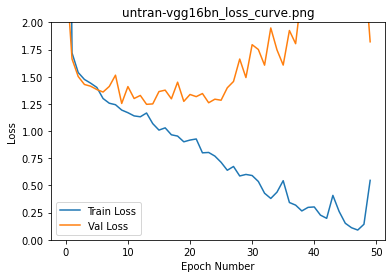

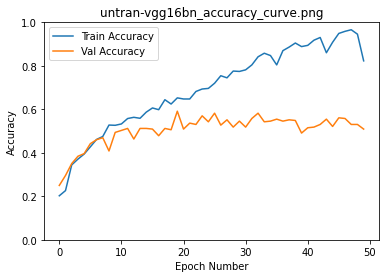

RuntimeError: CUDA error: out of memory

In [3]:
model_list = [model1]
lossfunc = torch.nn.CrossEntropyLoss().cuda(device)
for size in batch_size:
    i = 0
    for models in model_list:
        file_name = model_name_list[i]
        print(file_name)
        optimizer = optim.Adam(models.parameters())
        trainmodel(model_name=models,loss = lossfunc,batchsize=size,opti=optimizer,\
                   epoch_num=50,device_num=device,filename=file_name)
        i+=1